In [1]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scikitplot as skplt


### Data exploration

Data can be easily loaded within IBM Watson Studio. Instructions to load data within IBM Watson Studio can be found here. The data set can be located by its name and inserted into the notebook as a pandas DataFrame as shown below.

In [2]:
df_churn_pd = pd.read_csv(
    "https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers_missing_values_GENDER.csv")

df_churn_pd.head()


,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [3]:
print("The dataset contains columns of the following data types : \n" +str(df_churn_pd.dtypes))

The dataset contains columns of the following data types : 
ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object


In [4]:
print("The dataset contains following number of records for each of the columns : \n" +str(df_churn_pd.count()))

The dataset contains following number of records for each of the columns : 
ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64


Each category within the churnrisk column has the following count : 
CHURNRISK
High      983
Low       699
Medium    384
dtype: int64


Text(0, 0.5, 'Frequency')

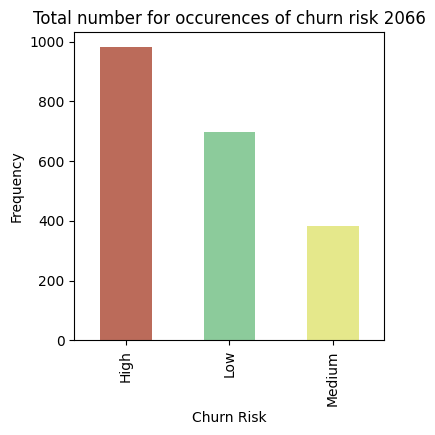

In [5]:
print( "Each category within the churnrisk column has the following count : ")
print(df_churn_pd.groupby(['CHURNRISK']).size())

#bar chart to show split of data
index = ['High','Medium','Low']
churn_plot = df_churn_pd['CHURNRISK'].value_counts(sort=True, ascending=False).plot(kind='bar',
            figsize=(4,4),title="Total number for occurences of churn risk " 
            + str(df_churn_pd['CHURNRISK'].count()), color=['#BB6B5A','#8CCB9B','#E5E88B'])

churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

### Data preparation

Data preparation is a very important step in machine learning model building. This is because the model can perform well only when the data it is trained on is good and well prepared. Hence, this step consumes the bulk of a data scientist's time spent building models.

During this process, we identify categorical columns in the dataset. Categories needed to be indexed, which means the string labels are converted to label indices. These label indices are encoded using One-hot encoding to a binary vector with at most a single-value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features to use categorical features.

Final step in the data preparation process is to assemble all the categorical and non-categorical columns into a feature vector. We use VectorAssembler for this. VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models.

In [6]:
#remove columns that are not required
df_churn_pd = df_churn_pd.drop(['ID'], axis=1)

df_churn_pd.head()

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [7]:
#Defining the categorical columns 
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',
                                                                         onehot_categorical)])


Categorical columns : 
['GENDER', 'STATUS', 'HOMEOWNER']


In [8]:
# Defining the numerical columns 
numericalColumns = df_churn_pd.select_dtypes(include=[np.float64,np.int64]).columns

print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

Numerical columns : 
Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')


In [9]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")

preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")


#. The transformation happens in the pipeline. Temporarily done here to show what intermediate value looks like
df_churn_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp)

df_churn_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_churn_pd)
print("Data after transforming :")
print(df_churn_pd_temp_2)


Data after transforming :
[[1.0 0.0 0.0 ... 13 0.0 152.76525]
 [1.0 0.0 0.0 ... 10 1349.635 0.0]
 [1.0 0.0 0.0 ... 5 1123.6125 0.0]
 ...
 [1.0 0.0 0.0 ... 11 0.0 82.50825]
 [1.0 0.0 0.0 ... 5 930.093 0.0]
 [0.0 1.0 0.0 ... 8 1041.604 0.0]]
Data after transforming :
[[1.0 0.0 0.0 ... -0.6792731303453047 -0.5106065181930338 'Medium']
 [1.0 0.0 0.0 ... 1.8354629319820521 -0.7959345330293706 'Low']
 [1.0 0.0 0.0 ... 1.4143217110983428 -0.7959345330293706 'Low']
 ...
 [1.0 0.0 0.0 ... -0.6792731303453047 -0.6418293606808149 'Medium']
 [1.0 0.0 0.0 ... 1.053742394902809 -0.7959345330293706 'Low']
 [0.0 1.0 0.0 ... 1.261517632686496 -0.7959345330293706 'Low']]


In [10]:
# prepare data frame for splitting data into train and test datasets

features = []
features = df_churn_pd.drop(['CHURNRISK'], axis=1)

label_churn = pd.DataFrame(df_churn_pd, columns = ['CHURNRISK']) 
label_encoder = LabelEncoder()
label = df_churn_pd['CHURNRISK']

label = label_encoder.fit_transform(label)
print("Encoded value of Churnrisk after applying label encoder : " + str(label))


Encoded value of Churnrisk after applying label encoder : [2 1 1 ... 2 1 1]


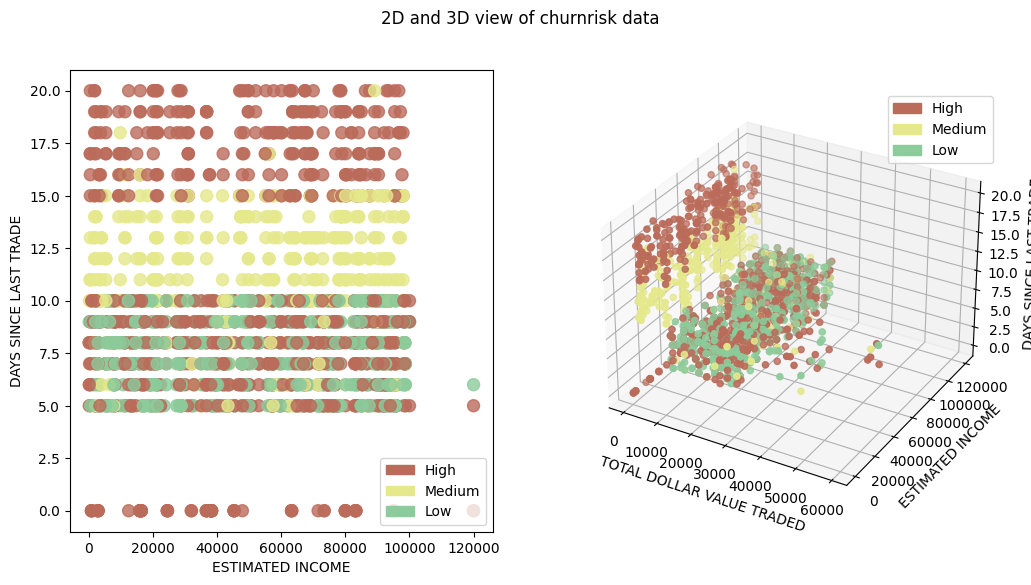

In [11]:
area = 75
x = df_churn_pd['ESTINCOME']
y = df_churn_pd['DAYSSINCELASTTRADE']
z = df_churn_pd['TOTALDOLLARVALUETRADED']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.8, c=colormap(label), s= area)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')

plt.legend(handles=[pop_a,pop_b,pop_c])

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, c=colormap(label), marker='o')

ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')

plt.legend(handles=[pop_a,pop_b,pop_c])

plt.show()

### Split data into test and train


In [12]:
X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1549, 15) Output label(1549,)
Dimensions of datasets that will be used for testing : Input features(517, 15) Output label(517,)


### Helper methods for graph generation


In [13]:
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

def two_d_compare(y_test,y_pred,model_name):
    #y_pred = label_encoder.fit_transform(y_pred)
    #y_test = label_encoder.fit_transform(y_test)
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'], alpha=0.8, c=colormap(y_test))
    plt.title('Actual')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.subplot(122)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'],alpha=0.8, c=colormap(y_pred))
    plt.title('Predicted')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.show()
    
x = X_test['TOTALDOLLARVALUETRADED']
y = X_test['ESTINCOME']
z = X_test['DAYSSINCELASTTRADE']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')

def three_d_compare(y_test,y_pred,model_name):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Actual vs Predicted (3D) data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))
    
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_test), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Actual')

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_pred), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Predicted')

    plt.show()
    

def model_metrics(y_test,y_pred):
    print("Decoded values of Churnrisk after applying inverse of label encoder : " + str(np.unique(y_pred)))

    skplt.metrics.plot_confusion_matrix(y_test,y_pred,text_fontsize="small",cmap='Greens',figsize=(6,4))
    plt.show()
        

### Naive Bayes 

In this milestone, we use a data set that contains information about customers of an online trading platform to classify whether a given customer’s probability of churn will be high, medium, or low. Because a previous tutorial covered the various preprocessing steps that need to occur before model creation, we skip those details in this tutorial. Instead, we do a detailed study of the different classification algorithms and apply it to the same data set for the sake of comparison. 

As stated earlier, classification is when the feature to be predicted contains categories of values. Each of these categories is considered as a class into which the predicted value falls. Classification algorithms include:

Naive Bayes
K-nearest neighbors
Logistic regression
(Kernel) SVM
Decision tree
Ensemble learning

Naive Bayes applies the Bayes’ theorem to calculate the probability of a data point belonging to a particular class. Given the probability of certain related values, the formula to calculate the probability of an event B, given event A to occur is calculated as follows.

P(B|A) = (P(A|B) * P(B) / P(A))

This theory is considered naive because it assumes that there is no dependency between any of the input features. Even with this not true or naive assumption, the Naive Bayes algorithm has been proven to perform really well in certain use cases like spam filters.

### Build Naive Bayes classification model

Applies the bayesian theorem to calculate the probabilty of a data point belonging to a particular class. Given the probability of certain related values,the formula to calculate the probabilty of an event B given event A to occur is calculated as follows.

In [14]:
from sklearn.naive_bayes import MultinomialNB

model_name = 'Naive Bayes Classifier'

nbClassifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

nb_model = Pipeline(steps=[('preprocessor', preprocessorForCategoricalColumns),('classifier', nbClassifier)]) 

nb_model.fit(X_train,y_train)

y_pred_nb= nb_model.predict(X_test)

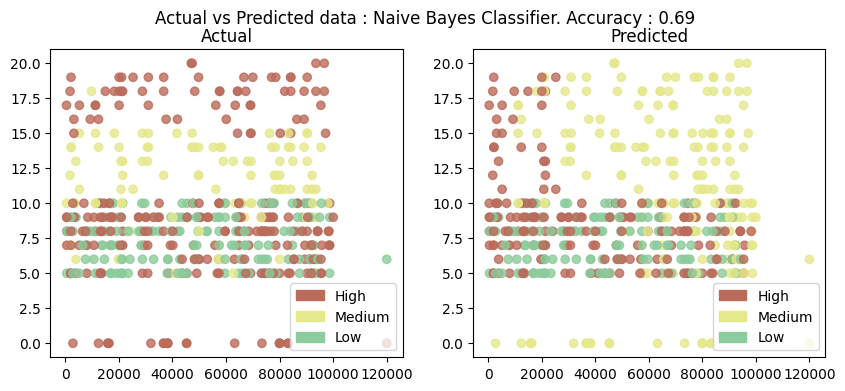

In [15]:
two_d_compare(y_test,y_pred_nb,model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


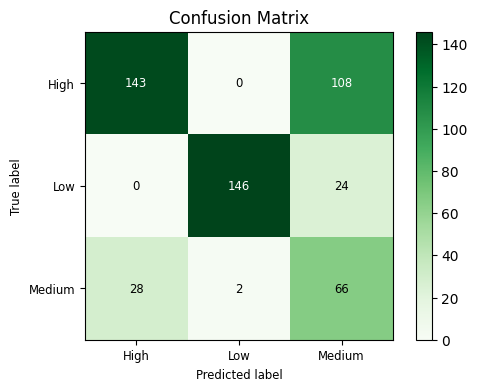

In [16]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_nb = label_encoder.inverse_transform(y_pred_nb)
model_metrics(y_test,y_pred_nb)

### Logistic Regression 

Logistic Regression is an extension of the linear regression algorithm. The details of the linear regression algorithm are discussed in Learn regression algorithms using Python and Scikit-learn. In a logistic regression algorithm, instead of predicting the actual continuous value, we predict the probability of an outcome. To achieve this, a logistic function is applied to the outcome of the linear regression. The logistic function is also referred to as a sigmoid function. This outputs a value between 0 and 1. Then, we select a line that depends on the use case. Any data point with a probability value above the line is classified into the class represented by 1. The data point below the line is classified into the class represented by 0. 



### Build Logistic Regression classification model

A logistic function is applied to the outcome of linear regression. The logistic function is also referred to as sigmoid function. This outputs a value between 0 and 1. We then select a line that depends on the use case, and any data point with probability value above the line is classified into the class represented by 1 and the data point below the line is classified into the class represented by 0.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

model_name = "Logistic Regression Classifier"

logisticRegressionClassifier = LogisticRegression(random_state=0, multi_class='auto', solver='lbfgs', 
                                                  max_iter=2000, penalty='l2', tol=0.001)


lrc_model = Pipeline(steps=[('preprocessor', preprocessorForCategoricalColumns),
                            ('scaler', StandardScaler()), 
                            ('classifier', logisticRegressionClassifier)])

lrc_model.fit(X_train, y_train)
y_pred_lrc = lrc_model.predict(X_test)


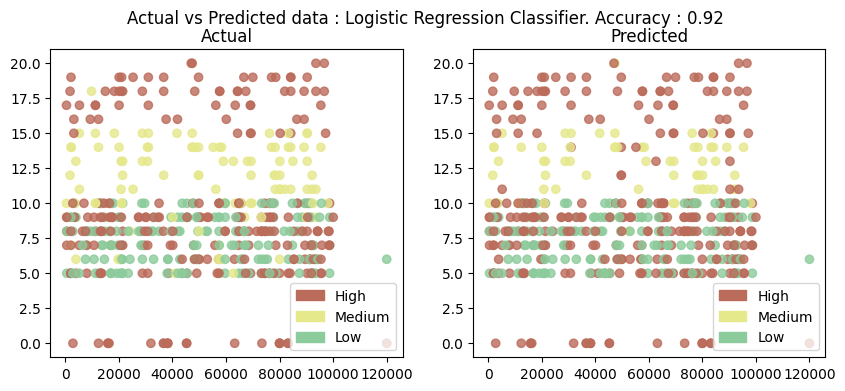

In [18]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test, y_pred_lrc, model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


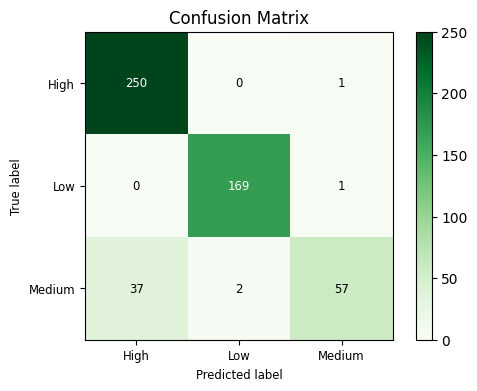

In [19]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_lrc = label_encoder.inverse_transform(y_pred_lrc)
model_metrics(y_test,y_pred_lrc)

### K-nearest neighbors 

The general idea behind K-nearest neighbors (KNN) is that data points are considered to belong to the class with which it shares the most number of common points in terms of its distance. K number of nearest points around the data point to be predicted are taken into consideration. These K points at this time already belong to a class. The data point under consideration is said to belong to the class with which the most number of points from these K points belong. There are several methods to calculate the distance between points. The most popular formula to calculate this is the Euclidean distance. 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "K-Nearest Neighbor Classifier"

knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p=2)

knn_model = Pipeline(steps=[('preprocessorALL',preprocessorForAllColumns),
                            ('classifier', knnClassifier)])
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)


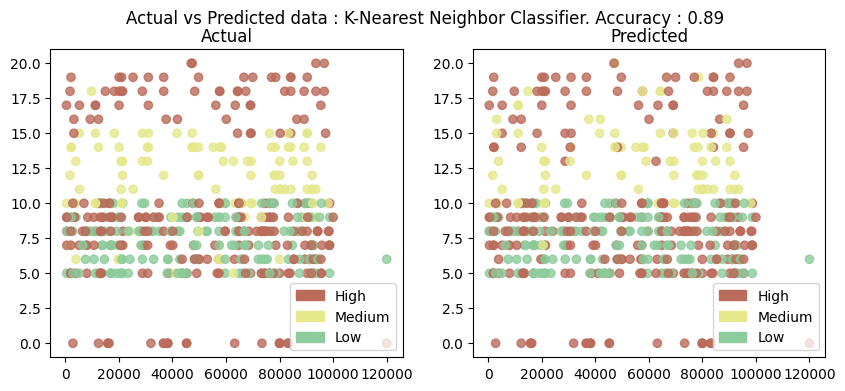

In [28]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test,y_pred_knn, model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


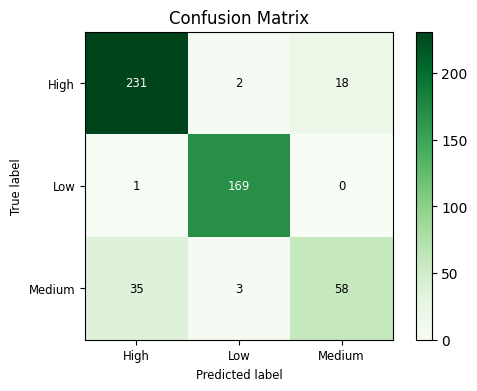

In [29]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_knn = label_encoder.inverse_transform(y_pred_knn)
model_metrics(y_test,y_pred_knn)

While analyzing the predicted output list, we see that the accuracy of the model is at 89%. A comparative chart between the actual and predicted values is also shown. 

### Support Vector Machines 

Support Vector Machines (SVM) output an optimal line of separation between the classes, based on the training data entered as input. This line of separation is called a hyperplane in a multi-dimensional environment. SVM takes into consideration outliers that lie pretty close to another class to derive this separating hyperplane. After the model is constructed with this hyperplane, any new point to be predicted checks to see which side of the hyperplane this value lies in.

Even in two-dimensional space, constructing this line of separation between classes can sometimes be tricky if the points are distributed without a clear distinction. Also, doing this when multiple features contribute to describe a data point is a complicated process. For these multi-dimensional spaces, where data is not linearly separable, we map it to a higher dimensional space to create this separation. This mapping to a higher dimension is achieved by applying a kernel function. There are several types of kernel functions, and the most common ones are the polynomial and the Gaussian radial basis function (RBF). After this plane of separation is derived, the data is mapped back to its original dimension. Prediction at this point is merely finding if this point lies within or outside the plane

The following code snippet shows an example of how to create and predict an SVM model using the libraries from scikit-learn. The kernel value is set to ‘rbf’ to generate the hyperplane. 

While analyzing the predicted output list, we see that the accuracy of the model is at 95%. A comparative chart between the actual and predicted values is also shown. Support Vector Machines 2D.

In [34]:
from sklearn.svm import SVC

model_name = "Kernel SVM Classifier"

svmClassifier = SVC(kernel='rbf', gamma= 'auto')

svm_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), 
                            ('classifier', svmClassifier)])
svm_model.fit(X_train, y_train)

y_pred_svm =svm_model.predict(X_test)

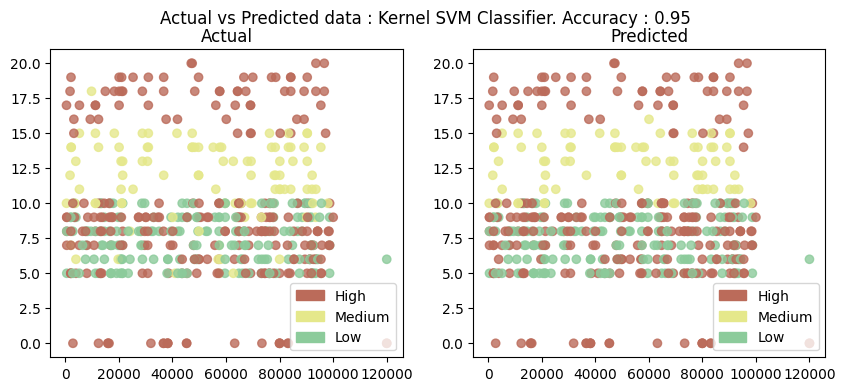

In [35]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test, y_pred_svm, model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


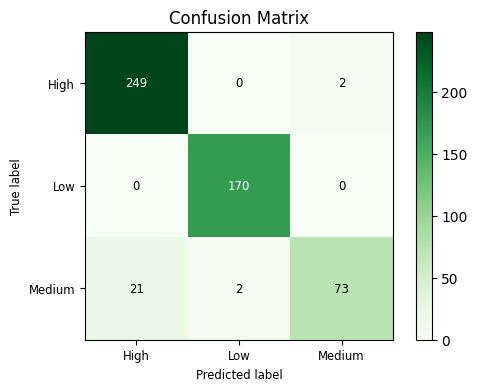

In [36]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
model_metrics(y_test, y_pred_svm)

While analyzing the predicted output list, we see that the accuracy of the model is at 89%. A comparative chart between the actual and predicted values is also shown. While analyzing the predicted output list, we see that the accuracy of the model is at 95%. A comparative chart between the actual and predicted values is also shown. Support Vector Machines 2D 

## More classification algorithms 

### Decision trees

Decision tree-based models use training data to derive rules that are used to predict an output. For example, assume that the problem statement was to identify if a person can play tennis today. Depending on the values from the training data, the model forms a decision tree. The model derived could have constructed a decision tree with the following rules. 

##### First, check the outlook column. If it’s overcast, you definitely never go.
##### But if it’s sunny and humid, then you don’t go.
##### If it’s sunny and normal, you go.
##### If it’s rainy and windy, you don’t go.
##### And if it’s rainy and not windy, you go.

### Ensemble learning

 Ensemble learning refers to the type of machine learning algorithm where more than one algorithm is combined to produce a better model. When two or more same algorithms are repeated to achieve this, it is called a homogenous ensemble algorithm. If different algorithms are assembled together, it is called a heterogeneous ensemble. In this section, we’ll look at how we can combine a decision tree-based model into a random forest and gradient boosted tree to get a higher accuracy level. Random forest.

#### Random forest

Decision tree algorithms are efficient in eliminating columns that don’t add value in predicting the output. In some cases, we are even able to see how a prediction was derived by backtracking the tree. However, this algorithm doesn’t perform individually when the trees are huge and hard to interpret. Such models are often referred to as weak models. The model performance is improvised by taking an average of several such decision trees derived from the subsets of the training data. This approach is called the random forest classification.

In [38]:
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest Classifier"

randomForestClassifier = RandomForestClassifier(n_estimators = 100, max_depth = 2,
                                                 random_state= 0)

rfc_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),
                            ('classifier', randomForestClassifier)])

rfc_model.fit(X_train, y_train)

y_pred_rfc = rfc_model.predict(X_test)


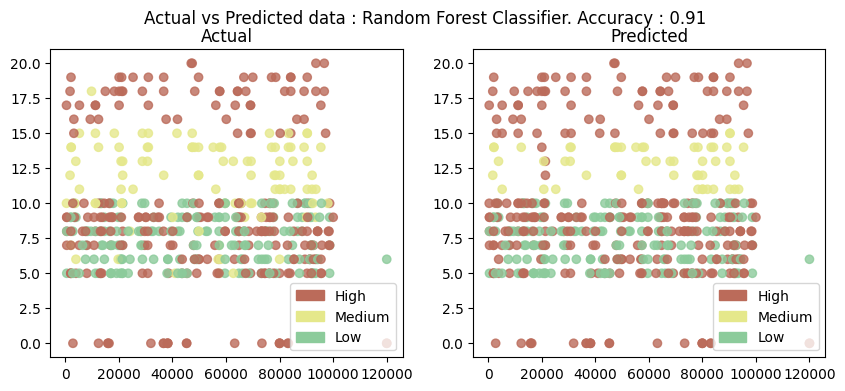

In [39]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test, y_pred_rfc, model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


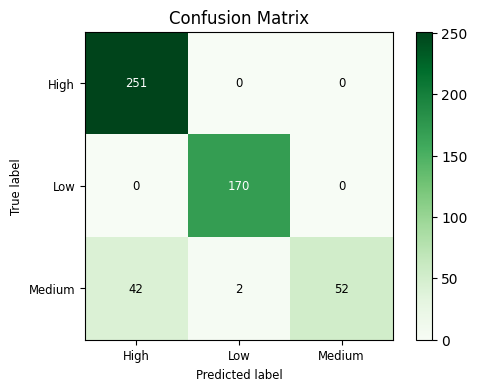

In [40]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_rfc = label_encoder.inverse_transform(y_pred_rfc)
model_metrics(y_test, y_pred_rfc)

### Gradient boosted trees 

Gradient boosted trees are also a type of ensemble learning. They are based on the method called boosting, which involves training a model one after another based upon the outputs from the previous models. 

In gradient boosted trees, we calculate the error from the previous model, also known as residuals. Now we define another model that is trained on this residual. The resulting model is the sum of the previous model and the model trained on residuals. This process is repeated until convergence. Even though gradient boosted trees outperform random forest models, they are computationally expensive because they are built sequentially. A specific implementation called XGBoost is used to overcome this issue. The details of XGBoost are out of the scope of this tutorial.

### Comparative study of different classification algorithms.


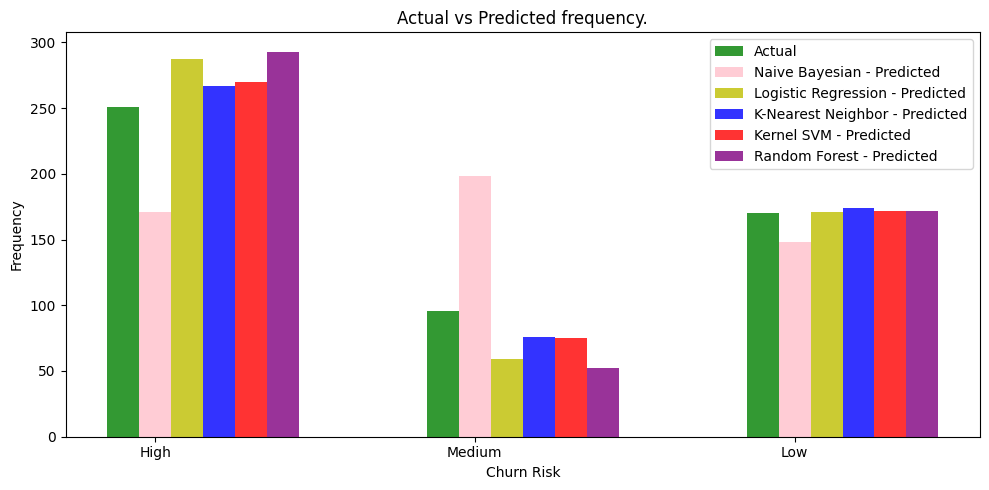

In [41]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_knn, return_counts=True)
frequency_predicted_knn = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_rfc, return_counts=True)
frequency_predicted_rfc = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_lrc, return_counts=True)
frequency_predicted_lrc = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_svm, return_counts=True)
frequency_predicted_svm = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_nb, return_counts=True)
frequency_predicted_nb = (occurCount[0],occurCount[2],occurCount[1])

n_groups = 3
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects2 = plt.bar(index + bar_width, frequency_predicted_nb, bar_width,
alpha=opacity,
color='pink',
label='Naive Bayesian - Predicted')

rects3 = plt.bar(index + bar_width*2, frequency_predicted_lrc, bar_width,
alpha=opacity,
color='y',
label='Logistic Regression - Predicted')

rects4 = plt.bar(index + bar_width*3, frequency_predicted_knn, bar_width,
alpha=opacity,
color='b',
label='K-Nearest Neighbor - Predicted')

rects5 = plt.bar(index + bar_width*4, frequency_predicted_svm, bar_width,
alpha=opacity,
color='red',
label='Kernel SVM - Predicted')

rects6 = plt.bar(index + bar_width*5, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

plt.xlabel('Churn Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('High', 'Medium', 'Low'))
plt.legend()

plt.tight_layout()
plt.show()
